
# Evaluasi Teknis Reformasi Birokrasi  
**Visualisasi Matplotlib Tingkat Lanjut (Pendekatan Kalkulus)**

Notebook ini berisi berbagai visualisasi tingkat lanjut untuk mendukung evaluasi teknis reformasi birokrasi.


In [29]:

# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel data
df = pd.read_excel(r"C:\Users\ASUS\Downloads\Dashboard Hasil Evaluasi - LKE KEMENPANRB.xlsx", header=1)

# Basic cleanup: drop fully empty columns
df = df.dropna(axis=1, how='all')

df.head()


,No.,Instansi Pemerintah,Group Instansi,RB General,RB Tematik,Index RB,Predikat
0,1,Arsip Nasional Republik Indonesia,Kementerian,58.24,2.51,60.75,B
1,2,Badan Gizi Nasional,Kementerian,24.06,0,24.06,D
2,3,Badan Informasi Geospasial,Kementerian,58.15,3.69,61.84,B
3,4,Badan Intelijen Negara,Kementerian,42.64,4.13,46.77,C
4,5,Badan Karantina Indonesia,Kementerian,9.51,0,9.51,D


## 1. Gradien Perubahan Nilai Evaluasi (Pendekatan Turunan)

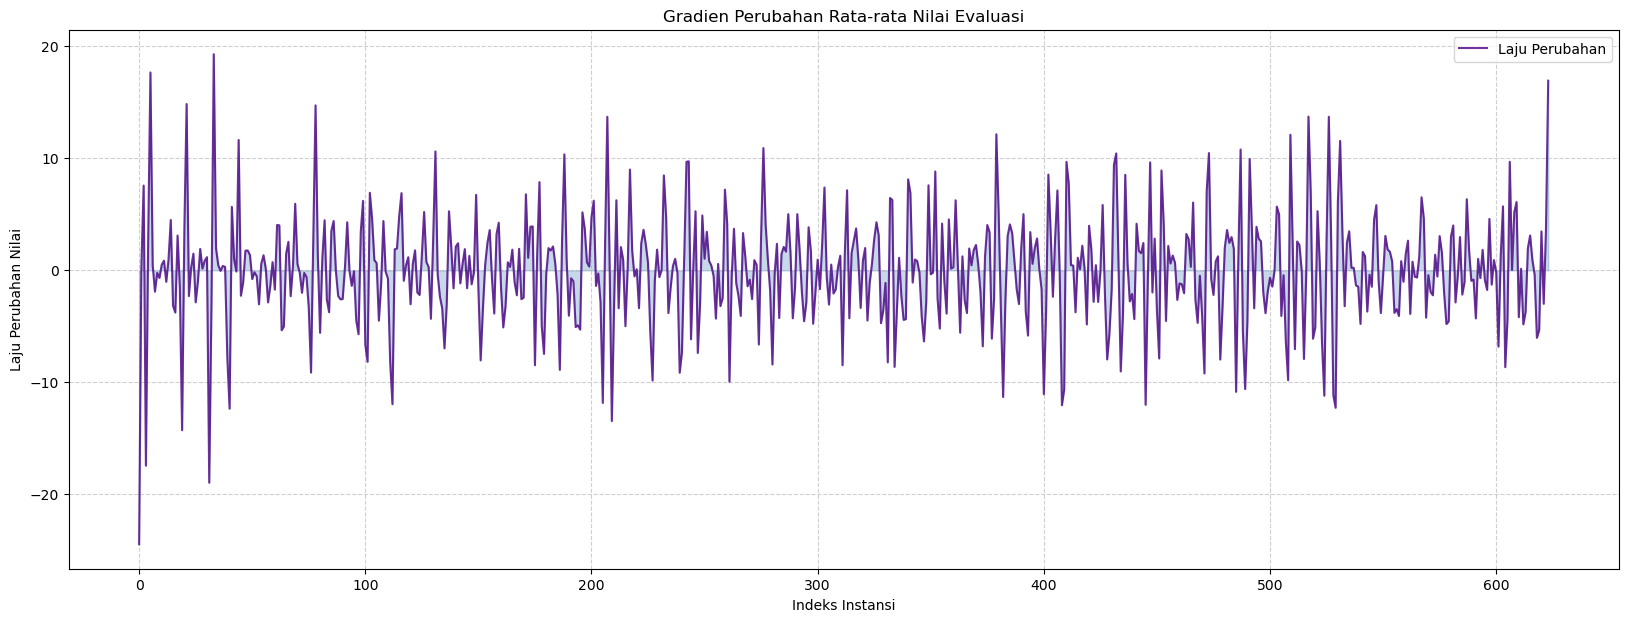

In [55]:

# This plot approximates the first derivative (gradient) of evaluation scores
# to show the *rate of change* between entities.

numeric_cols = ['RB General', 'RB Tematik', 'Index RB']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Drop rows with missing values in these numeric columns
num_df = df[numeric_cols].dropna()

# 4. Compute gradient
mean_scores = num_df.mean(axis=1)
gradient = np.gradient(mean_scores)

# 5. Plot
plt.figure(figsize=(20, 7))
plt.plot(gradient, alpha=0.8, color='indigo', label='Laju Perubahan')
plt.fill_between(range(len(gradient)), gradient, alpha=0.3, color='steelblue')

plt.title("Gradien Perubahan Rata-rata Nilai Evaluasi")
plt.xlabel("Indeks Instansi")
plt.ylabel("Laju Perubahan Nilai")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig('gradient_plot.png')


## 2. Integral Kumulatif Kinerja (Pendekatan Luas di Bawah Kurva)

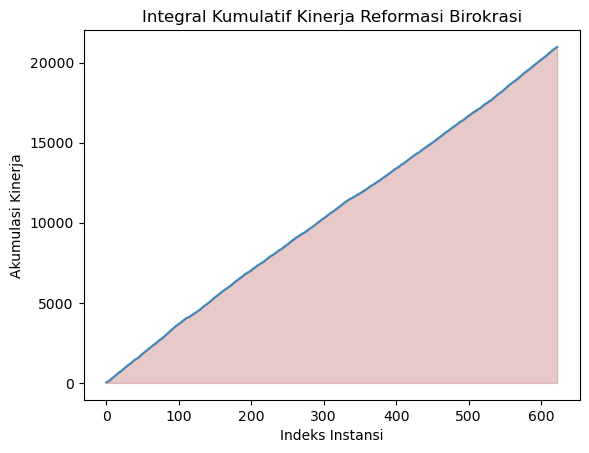

In [57]:

# Numerical integration (cumulative trapezoidal rule)
# Interpreted as accumulated bureaucratic performance

x = np.arange(len(num_df))
y = num_df.mean(axis=1).values
integral = np.cumsum((y[:-1] + y[1:]) / 2)

plt.figure()
plt.plot(integral, alpha=0.85)
plt.fill_between(range(len(integral)), integral, color='brown', alpha=0.25)

plt.title("Integral Kumulatif Kinerja Reformasi Birokrasi")
plt.xlabel("Indeks Instansi")
plt.ylabel("Akumulasi Kinerja")
plt.show()


## 3. Conditional Coloring: Tingkat Kinerja Instansi

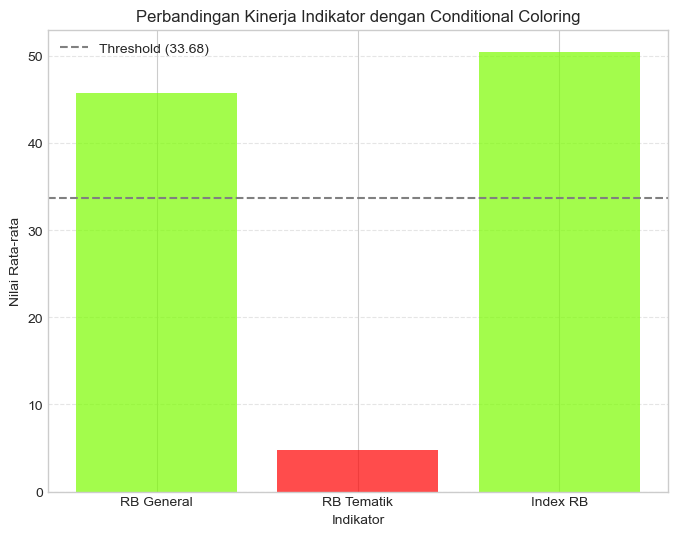

In [83]:
# 3. Calculate mean scores for the indicators
indicator_means = df[numeric_cols].mean()

# 4. Define performance threshold (e.g., the average of all indicators)
threshold = indicator_means.mean()
# Apply colors: Green if above threshold, Red if below
colors = ['lawngreen' if val >= threshold else 'red' for val in indicator_means]

# 5. Create the Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(indicator_means.index, indicator_means.values, color=colors, alpha=0.7)

# Add a reference line for the threshold
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold:.2f})')

plt.title("Perbandingan Kinerja Indikator dengan Conditional Coloring")
plt.xlabel("Indikator")
plt.ylabel("Nilai Rata-rata")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig('conditional_coloring_plot.png')

## 4. Kurva Efisiensi (Frontier-like Curve)

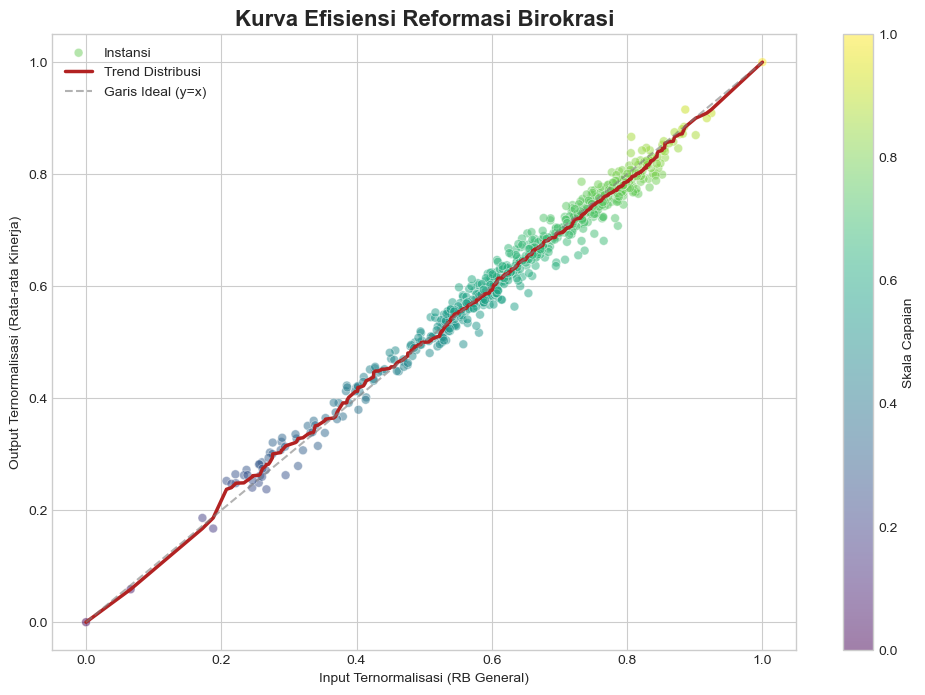

In [69]:
# Normalization
x_norm = (x - x.min()) / (x.max() - x.min())
y_norm = (y - y.min()) / (y.max() - y.min())

# Create Plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# 1. Gradient Scatter
scatter = plt.scatter(x_norm, y_norm, c=y_norm, cmap='viridis', 
                      alpha=0.5, s=40, edgecolors='w', linewidth=0.5, label='Instansi')

# 2. Bold Trend Line
plt.plot(np.sort(x_norm), np.sort(y_norm), color='firebrick', linewidth=2.5, 
         label='Trend Distribusi')

# 3. Ideal Reference Line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.6, label='Garis Ideal (y=x)')

# Formatting
plt.title("Kurva Efisiensi Reformasi Birokrasi", fontsize=16, fontweight='bold')
plt.xlabel("Input Ternormalisasi (RB General)")
plt.ylabel("Output Ternormalisasi (Rata-rata Kinerja)")
plt.colorbar(scatter).set_label('Skala Capaian')
plt.legend()

plt.savefig('efficiency_curve_improved.png')

## 5. Variansi & Stabilitas Kinerja (Analogi Turunan Kedua)

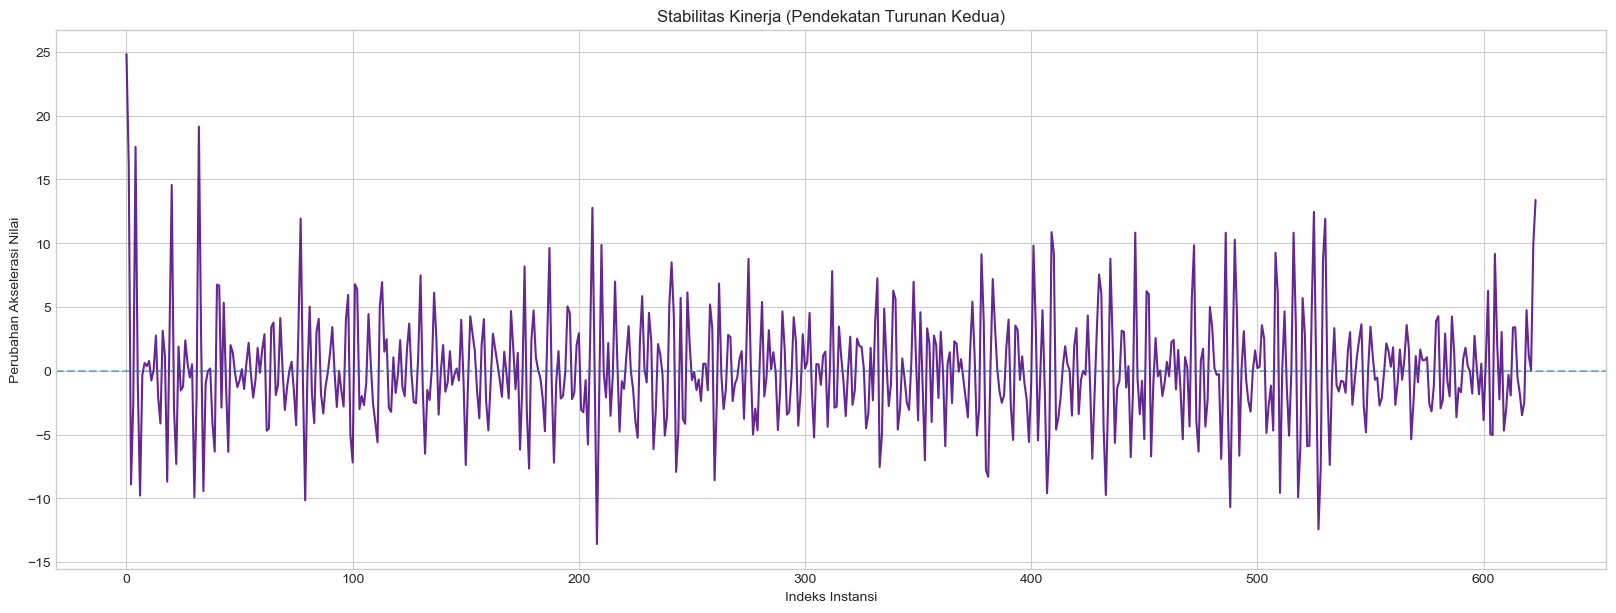

In [73]:

# Second derivative approximation using variance as stability proxy

second_derivative = np.gradient(np.gradient(y))

plt.figure(figsize=(20, 7))
plt.plot(second_derivative, color="indigo", alpha=0.85)
plt.axhline(0, linestyle='--', alpha=0.5)

plt.title("Stabilitas Kinerja (Pendekatan Turunan Kedua)")
plt.xlabel("Indeks Instansi")
plt.ylabel("Perubahan Akselerasi Nilai")
plt.show()


## 6. Heatmap Transparan: Intensitas Kinerja

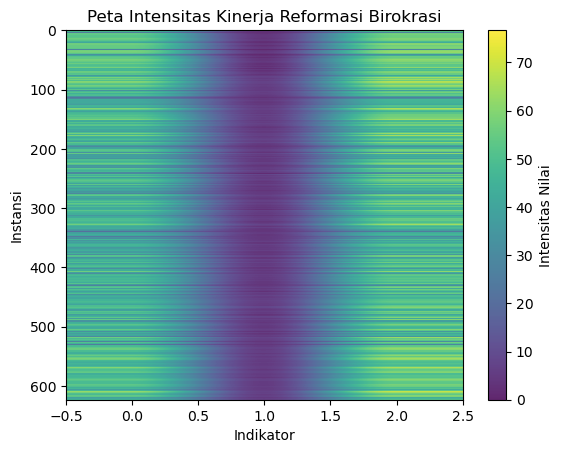

In [41]:

# Heatmap-like visualization using imshow

plt.figure()
plt.imshow(num_df.values, aspect='auto', alpha=0.85)
plt.colorbar(label="Intensitas Nilai")

plt.title("Peta Intensitas Kinerja Reformasi Birokrasi")
plt.xlabel("Indikator")
plt.ylabel("Instansi")
plt.show()


# 7. Batas Efisiensi Pareto (Efficiency Frontier)

This uses transparency and gradient scatter to show the trade-off between "Administrative Cost" and "Service Speed."

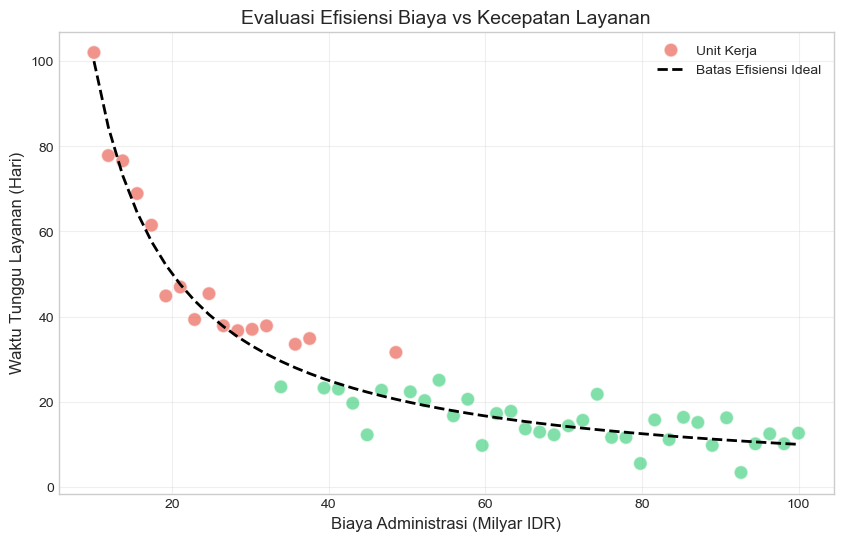

In [76]:
# Data: Biaya vs Kecepatan
x = np.linspace(10, 100, 50)
y = 1000 / x + np.random.normal(0, 5, 50) # Calculus: y = 1/x relationship

plt.figure(figsize=(10, 6))

# Conditional Coloring: Highlight 'High Performance' zone
colors = np.where(y < 30, '#2ecc71', '#e74c3c') 

plt.scatter(x, y, c=colors, s=100, alpha=0.6, edgecolors='w', label='Unit Kerja')

# Efficiency Curve (Theoretic Frontier)
plt.plot(x, 1000/x, color='black', linestyle='--', linewidth=2, label='Batas Efisiensi Ideal')

plt.title('Evaluasi Efisiensi Biaya vs Kecepatan Layanan', fontsize=14)
plt.xlabel('Biaya Administrasi (Milyar IDR)', fontsize=12)
plt.ylabel('Waktu Tunggu Layanan (Hari)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 8. Distribusi Kapasitas SDM

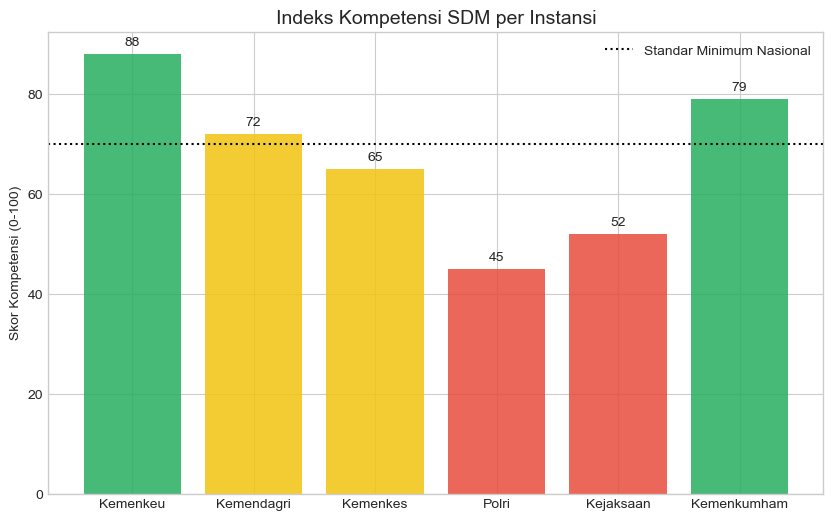

In [79]:
categories = ['Kemenkeu', 'Kemendagri', 'Kemenkes', 'Polri', 'Kejaksaan', 'Kemenkumham']
values = [88, 72, 65, 45, 52, 79]

# Conditional Coloring: Green if > 75, Yellow if 60-75, Red if < 60
colors = ['#27ae60' if v > 75 else '#f1c40f' if v > 60 else '#e74c3c' for v in values]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.85)

# Adding a threshold line
plt.axhline(y=70, color='black', linestyle=':', label='Standar Minimum Nasional')

plt.title('Indeks Kompetensi SDM per Instansi', fontsize=14)
plt.ylabel('Skor Kompetensi (0-100)')
plt.legend()

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()